### 07-3. 신경망 모델 훈련 ###

##### 1. 데이터 전처리 #####

In [1]:
# 데이터 불러오기

from tensorflow import keras
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) =\
keras.datasets.fashion_mnist.load_data()
X_train_scaled = X_train / 255.0
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [4]:
def model_fn(a_layer=None) :
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation="relu"))
    if a_layer :
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation="softmax"))
    return model

In [5]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train, y_train, epochs=5, verbose=0)

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

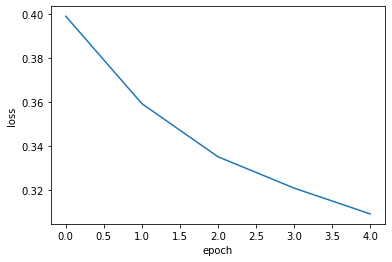

In [18]:
# 손실 그래프 그리기

import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

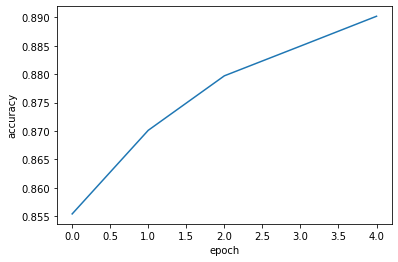

In [20]:
# 정확도 그래프 그리기

import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

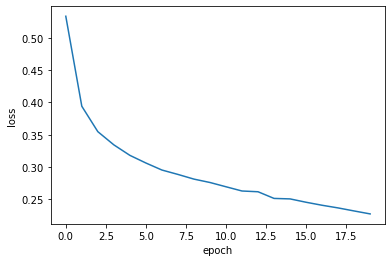

In [21]:
# epoch 횟수 늘려 훈련한 손실 그래프 그리기

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train, y_train, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [23]:
# 검증 손실

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=(X_test, y_test))

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

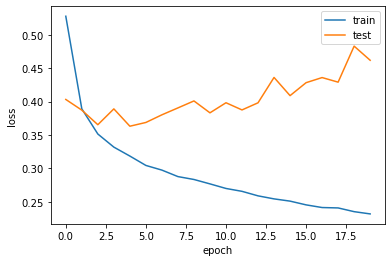

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"])
plt.show()

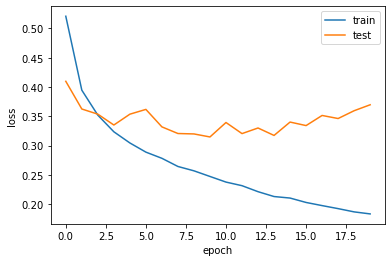

In [27]:
# Adam 옵티마이저를 적용하여 훈련

model = model_fn()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=(X_test, y_test))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"])
plt.show()

##### 2. 드롭아웃 #####
##### - 훈련 과정에서 일부 뉴런을 랜덤하게 출력 0 으로 만드는 방식 #####


In [32]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


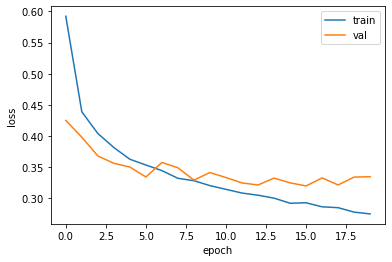

In [33]:
# adams 를 이용한 옵티마이저

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=(X_test, y_test))
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

##### 3. 모델 저장과 복원 #####

In [89]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train, y_train, epochs=10, verbose=0, validation_data=(X_test, y_test))

In [90]:
# save_weights() 메서드 : 훈련된 모델의 파라미터 저장
# 기본적으로 텐서플로의 체크포인트 포맷으로 저장하지만, 파일 확장자를 .h5로 지정하면 HDF5 포맷으로 저장

model.save_weights("model-weights.h5")

In [91]:
# save() 메서드 : 모델 구조와 모델 파라미터를 함께 저장

model.save('model-whole.h5')

In [96]:
# 파일 확인

%ls -al *.h5

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2CAD-068B

 C:\Users\user\Documents\Study3 디렉터리


 C:\Users\user\Documents\Study3 디렉터리

2021-09-09  오후 03:32           981,776 model-hole.h5
2021-09-09  오후 03:52           332,480 model-weights.h5
2021-09-09  오후 03:52           981,776 model-whole.h5
               3개 파일           2,296,032 바이트
               0개 디렉터리  138,905,083,904 바이트 남음


In [97]:
# 훈련하지 않은 새로운 모델을 만들고 훈련된 모델 파라미터 읽어서 사용하기

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("model-weights.h5")

In [98]:
# predict() 메서드 결과에서 가장 큰 값 고르기

import numpy as np

val_labels = np.argmax(model.predict(X_test), axis=-1) # argmax() : 배열에서 가장 큰 값의 인덱스 반환
print(np.mean(val_labels == y_test)) # 인덱스와 타깃값 비교하여 정확도

0.8783333333333333


In [104]:
# 모델 전체를 파일에서 읽은 다음 test set의 정확도 출력

model = keras.models.load_model('model-whole.h5')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.evaluate(X_test, y_test)

375/375 [==============================] - 0s 457us/step - loss: 0.3319 - accuracy: 0.8783


[0.33185017108917236, 0.878333330154419]

##### 4. 콜백과 조기종료 #####
##### 콜백 - 훈련 과정 중간에 어떠한 작업을 수행할 수 있게 하는 객체 #####
##### 조기종료 - 과대적합이 시작되기 전에 훈련을 미리 중지하는 것 #####

In [106]:
# ModelCheckpoint 콜백 : 기본적으로 최상의 검증 점수를 만드는 모델을 저장

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=(X_test, y_test), callbacks=[checkpoint_cb])

In [108]:
model = keras.models.load_model('best-model.h5')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.evaluate(X_test, y_test)

375/375 [==============================] - 0s 441us/step - loss: 0.3198 - accuracy: 0.8874


[0.31975629925727844, 0.887416660785675]

In [112]:
# 조기종료, 되돌리기를 통한 콜백

model =model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=(X_test, y_test), callbacks=[checkpoint_cb, early_stopping_cb])

In [113]:
# 몇번째 epoch에서 중지했는지

print(early_stopping_cb.stopped_epoch)

11


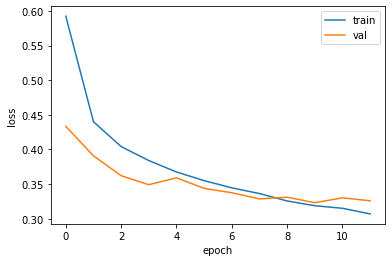

In [114]:
# 훈련 손실, 검증 손실 그래프

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [115]:
# test set에 대한 성능

model.evaluate(X_test, y_test)

375/375 [==============================] - 0s 429us/step - loss: 0.3231 - accuracy: 0.8832


[0.32307758927345276, 0.8832499980926514]